In [1]:
%matplotlib inline

import os
print(os.getcwd())
import sys

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sys.path.append('../../my_modules/')
from utils import plot_confusion_matrix

/workspace/projects/b99-errorAna


In [2]:
TARGET = 'y'

clf_threshold = 0.5

In [3]:
import pandas as pd 
pred_df = pd.read_csv('../b01-baselineLightGBM/cv_pred.csv',index_col='id')

features = [c for c in pred_df.columns if not c in [TARGET,'pred']]

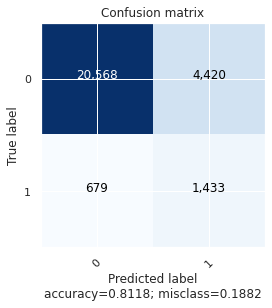

In [4]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=pred_df['y'],y_pred=pred_df['pred']>clf_threshold)
plot_confusion_matrix(cm,
                      target_names=[0,1],
                      normalize=False,
                      )

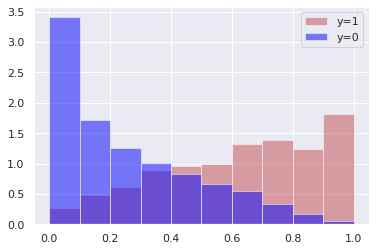

In [5]:
bins = np.arange(0,1.1,0.1)

fig,axs = plt.subplots()
axs.hist(pred_df.loc[pred_df['y']==1,'pred'],
         bins=bins,
         color='r',
         alpha=0.5,
         density=True,
         label='y=1'
         )
axs.hist(pred_df.loc[pred_df['y']==0,'pred'],
         bins=bins,
         color='blue',
         alpha=0.5,
         density=True,
         label='y=0'
         )
axs.legend()

In [6]:
pred_df['tp'] = (pred_df[TARGET]==1)&(pred_df['pred']>clf_threshold)
pred_df['fp'] = (pred_df[TARGET]==0)&(pred_df['pred']>clf_threshold)
pred_df['fn'] = (pred_df[TARGET]==1)&(pred_df['pred']<clf_threshold)
pred_df['tn'] = (pred_df[TARGET]==0)&(pred_df['pred']<clf_threshold)

pred_df['pred_res'] = pred_df[['tp','fp','fn','tn']].apply(lambda x: 'tp' if x['tp'] else 'fp' if x['fp'] else 'fn' if x['fn'] else 'tn', axis=1)

pred_df.drop(['tp','fp','fn','tn'],axis=1,inplace=True)

In [7]:
pred_df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pred,pred_res
id,,,,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0,0.115168,tn
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1,0.545204,tp
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0,0.043420,tn
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0,0.019589,tn
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0,0.421665,tn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown,0,0.024575,tn
27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown,0,0.117681,tn
27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown,0,0.460299,tn


In [8]:
#sns.pairplot(pred_df.loc[::2,[c for c in pred_df.columns if not c in ['y','pred']]], hue='pred_res')

In [9]:
# label encoding
for col in features:
    if pred_df[col].dtype==object:
        pred_df[col] = pred_df[col].astype('category')
        pred_df[col] = pred_df[col].cat.codes

In [10]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27100 entries, 0 to 27099
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        27100 non-null  int64  
 1   job        27100 non-null  int8   
 2   marital    27100 non-null  int8   
 3   education  27100 non-null  int8   
 4   default    27100 non-null  int8   
 5   balance    27100 non-null  int64  
 6   housing    27100 non-null  int8   
 7   loan       27100 non-null  int8   
 8   contact    27100 non-null  int8   
 9   day        27100 non-null  int64  
 10  month      27100 non-null  int8   
 11  duration   27100 non-null  int64  
 12  campaign   27100 non-null  int64  
 13  pdays      27100 non-null  int64  
 14  previous   27100 non-null  int64  
 15  poutcome   27100 non-null  int8   
 16  y          27100 non-null  int64  
 17  pred       27100 non-null  float64
 18  pred_res   27100 non-null  object 
dtypes: float64(1), int64(8), int8(9), object(1)
me

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(pred_df.loc[pred_df['pred_res']=='fp',features], method='ward', metric="euclidean")
dendrogram(Z)
plt.title('ward')
plt.show()

NameError: name 'method' is not defined